<a href="https://colab.research.google.com/github/GustavoSilva95/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Los Angeles*

Muitos já usaram, ou ja ouviram falar, dos serviços da AirBed & Breakfast... não? Ah, hoje é a famosa [Airbnb](https://www.airbnb.com.br/). Fundada em San Francisco em 2008, a Airbnb se tornou a maior empresa hoteleira da atualidade, com presença global. O detalhe é que a empresa não possui nenhum hotel, sendo uma das principais representantes da "economia do compartilhamento".

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Este notebook, faz uma análise dos dados referentes à cidade de Los Angeles - EUA, com o objetivo de trazer insights para a tomada de decisão de futuros viajante. 

Los Angeles é a segunda cidade mais populosa dos Estados Unidos e uma das mais multiculturais do país, onde metade da população é composta por imigrantes de todo o mundo. Capital do entretenimento dos EUA, Los Angeles é conhecida mundialmente pela indústria cinematográfica, mas a cidade não resume-se apenas a hollywood.

Com o clima tipicamente californiano a região possui praias fantásticas, além de bares, restaurantes, áreas para compras, vida noturna e, claro, estúdios de cinema. Enfim, um destino turístico que agrada todos os gostos e que atrai 40 milhões de turistas todos os anos.

<center><img alt="Los Angeles" width="100%" src="https://bit.ly/2Z8dIJS"></center>





## Obtenção dos Dados

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Los Angeles (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o conjunto de dados exato utilizado nesse notebook não esteja mais disponível, o que quebraria o código.

Pensando nisso, foi disponibilizado [aqui](https://drive.google.com/file/d/1gVLJRHgk0sWjnItB02G4JRwdGJ6qIdWr/view?usp=sharing) o conjunto que foi utilizado, para que sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2021-09-08/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número de identificação do imóvel
* `name` - Título do anúncio da propriedade
* `host_id` - Número de identificação do proprietário
* `host_name` - Nome do proprietário
* `neighbourhood_group` - Nome do grupo no qual o bairro pertence
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada de latitude da propriedade
* `longitude` - Coordenada de longitude da propriedade
* `room_type` - Tipo de acomodação oferecida
* `price` - Valor do aluguel na moeda local (USD)
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de reviews que a propriedade possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - Quantidade de reviews dos últimos 12 meses
* `license` - Licença do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,2016-05-15,0.02,1,138,0,NaN
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,74,30,31,2021-06-19,0.69,2,343,5,NaN
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,175,7,21,2019-12-27,0.37,2,333,0,228269
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.87490,-118.11515,Entire home/apt,50,30,0,NaN,NaN,1,0,0,NaN
4,3021,Hollywood Hills Zen Modern style Apt/Guesthouse,3415,Nataraj,City of Los Angeles,Hollywood Hills West,34.11160,-118.38223,Entire home/apt,118,31,23,2018-10-31,0.40,4,219,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]}\n')
# verificar o tipo das variáveis do dataset
df.dtypes

Entradas: 32421
Variáveis: 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a variável `license` possui aproximadamente 75% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` apresentam 25% de valores nulos.
* As variáveis `host_name` e `name` não chegam a 0,1% dos valores nulos.

As variáveis `license` e `last_review` representam respectivamente licença do imóvel e data do último review, informações que não são relevantes para essa análise.
A quantidade de reviews por mês (`reviews_per_month`) caso seja interessante para uma análise futura podemos obter essas informações através da variável `number_of_reviews_ltm` que traz a quantidade de reviews por ano. Deste modo pode-se elimina-las do dataset. Já as variáveis `host_name` e `name` elimina-se apenas as entradas faltantes, visto que estas representam menos de 0,1% do dataset.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

license                           74.639894
reviews_per_month                 24.752475
last_review                       24.752475
host_name                          0.752599
name                               0.006169
longitude                          0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
room_type                          0.000000
number_of_reviews_ltm              0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
id                                 0.000000
dtype: float64

In [6]:
# excluindo colunas com dados faltantes
df.drop(columns=['license', 'reviews_per_month', 'last_review'], inplace=True)

# excluindo linhas com dados faltantes
df.dropna(axis=0, inplace=True)

In [7]:
# conferindo o resultado da limpeza
print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]}\n')
df.isnull().sum().sort_values(ascending=False)

Entradas: 32175
Variáveis: 15



number_of_reviews_ltm             0
availability_365                  0
calculated_host_listings_count    0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

Apartir de agora o dataset não possui nunhum dado faltante.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Ao plotar um histograma pode-se ter uma melhor visualização com relação a distribuição das variáveis.

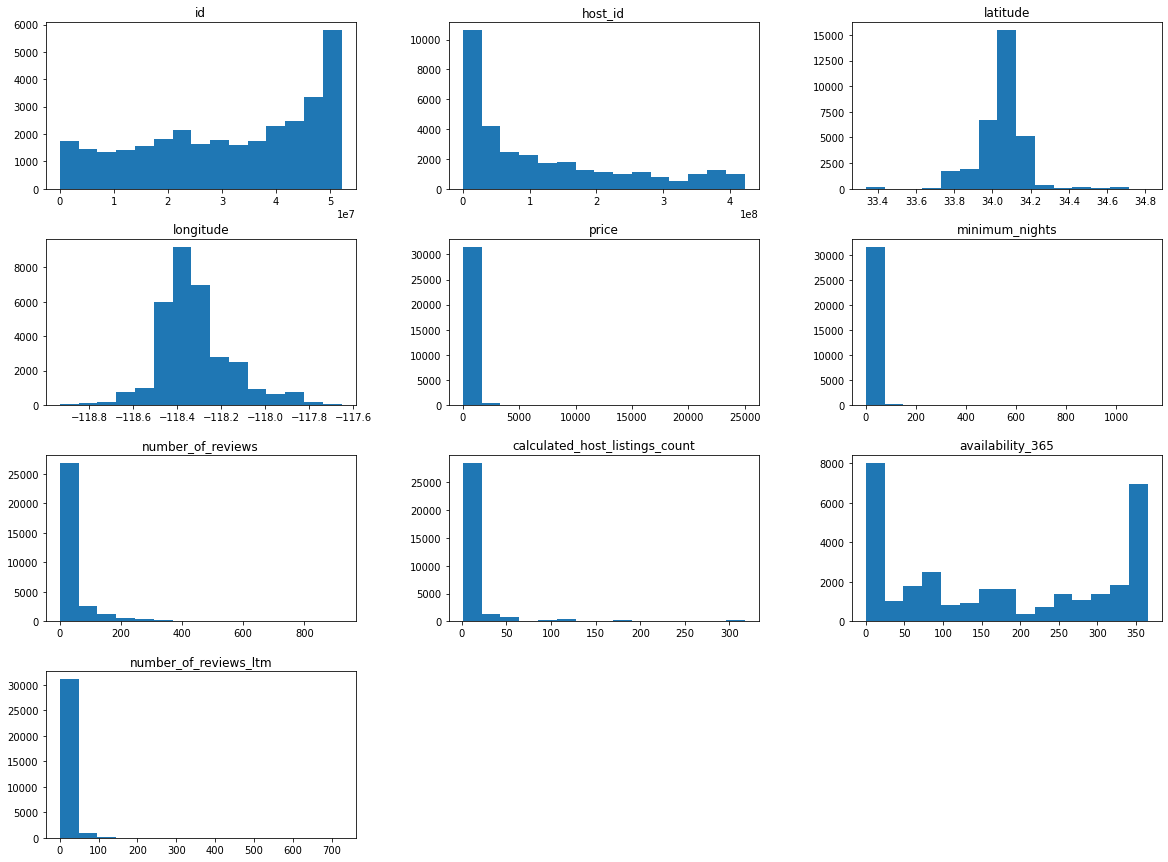

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,15), grid=False);

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers* (dados que se diferenciam drasticamente de todos os outros). Principalmente nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

## Outliers

Os *outliers* desse conjunto de dados serão tratados da seguinte forma:

* Analizando a `distribuição estatística`
* Calcular os limites utilizando a regra do `IQR Score`.
* Plotar `boxplots`

In [9]:
# resumo estatístico das principais variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe().round(2)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,32175.00,32175.00,32175.00,32175.00,32175.00,32175.00
mean,258.98,20.98,34.05,13.73,173.27,7.05
std,717.38,36.40,68.49,40.25,140.68,16.39
min,0.00,1.00,0.00,1.00,0.00,0.00
25%,77.00,2.00,1.00,1.00,25.00,0.00
50%,125.00,30.00,6.00,2.00,159.00,1.00
75%,220.00,30.00,34.00,6.00,329.00,5.00
max,25000.00,1125.00,922.00,317.00,365.00,726.00


Aqui, algumas coisas chamam atenção, como por exemplo:

* A variável `price` tem o mínimo em 0. Lembrando que a variável `price` trata do preço da diária dos imóveis em moeda local (USD). Apresentando 75% dos valores abaixo de 220 dólares mas o máximo estando em 25 mil dórales, indica claramente a presença de outliers nessa variável.
* A variável `minimum_nights` tem como seu máximo o valor 1125, sendo que 75% dos valores estão abaixo de 30. Claramente temos outliers nessa variável.
* Para essa análise apenas as variáveis `price` e `minimum_nights` serão tratadas. As variáveis `number_of_reviews`, `calculated_host_listings_count` e `availability_365` não serão tratadas agora.

### Definindo limites para `price` utilizando a regra do `IQR Score`

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

### IQR = Q3 - Q1

Com o IQR calculado pode-se encontrar o limite superior e inferior, ou seja, os valores limites onde o que estiver fora deles serão considerados *outliers*.
* Limite superior = Q3 + 1.5 * IQR
* Limite inferior = Q1 - 1.5 * IQR

In [10]:
# encontrando o IQR da variável price
Q1_price = df.price.quantile(.25)
Q3_price = df.price.quantile(.75)
IQR_price = Q3_price - Q1_price
print(f'IQR da variável price: {IQR_price}')

# definindo os limites para a variável price
sup_price = Q3_price + 1.5 * IQR_price
inf_price = Q1_price - 1.5 * IQR_price
print(f'Limite superior de price: {sup_price}')
print(f'Limite iferior de price: {inf_price}')

IQR da variável price: 143.0
Limite superior de price: 434.5
Limite iferior de price: -137.5


Aqui pode-se ver que, apesar de não ter outliers na parte inferior, continua tendo valores iguais a 0, que precisam ser tratados.

### Definindo limites para `minimum_nights` utilizando a regra do `IQR Score`
Antes de tratar os *outliers* do conjunto de dados, é preciso definir os limites da variável `minimum_nights` da mesma forma que foi feito em `price`.

In [11]:
# encontrando o IQR da variável minimum_nights
Q1_minimum_nights = df.minimum_nights.quantile(.25)
Q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = Q3_minimum_nights - Q1_minimum_nights
print(f'IQR da variável minimum_nights: {IQR_minimum_nights}')

# definindo os limites para a variável minimum_nights
sup_minimum_nights = Q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = Q1_minimum_nights - 1.5 * IQR_minimum_nights
print(f'Limite superior de minimum_nights: {sup_minimum_nights}')
print(f'Limite inferior de minimum_nights: {inf_minimum_nights}')

IQR da variável minimum_nights: 28.0
Limite superior de minimum_nights: 72.0
Limite inferior de minimum_nights: -40.0


Da mesma forma que a variável price, minimum_nights não possui *outlier* na parte inferior.

### Limpando Outliers

Com os valores limites definidos para as variáveis `price` e `minimum_nights` começa a limpeza do dataset, onde será excluido os valores que ficaram fora desses limites. O dataset resultante da limpeza será armazenado em um novo DataFrame chamado `df_clean`.

In [12]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 434.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 72].index, axis=0, inplace=True)

print(f'Dataset antes da limpeza: {df.shape[0]}')
print(f'Dataset após da limpeza: {df_clean.shape[0]}')
print(f'Os outlies eliminados representam {((df.shape[0] - df_clean.shape[0]) / df.shape[0] * 100):.2f}% do dataset')

Dataset antes da limpeza: 32175
Dataset após da limpeza: 28554
Os outlies eliminados representam 11.25% do dataset


### Verificando conjunto limpo `x` conjunto original

De maneira gráfica será mostrado o conjunto de dados das variáveis `price` e `minimum_nights` antes da limpeza e como ficou após a limpeza.

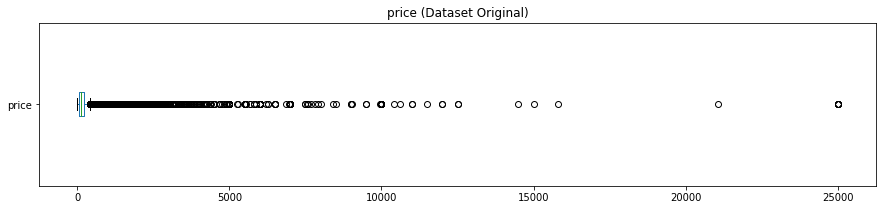

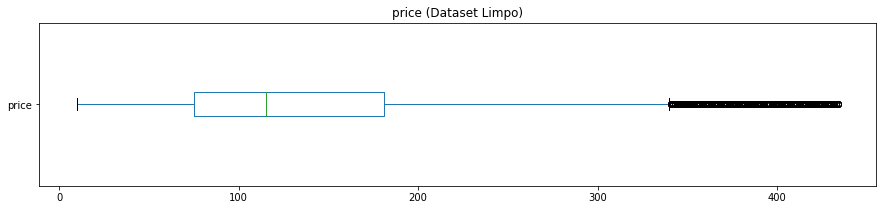

In [13]:
#boxplot price original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False)
ax.set_title('price (Dataset Original)')
plt.show()

# boxplot price limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False)
ax.set_title('price (Dataset Limpo)')
plt.show()

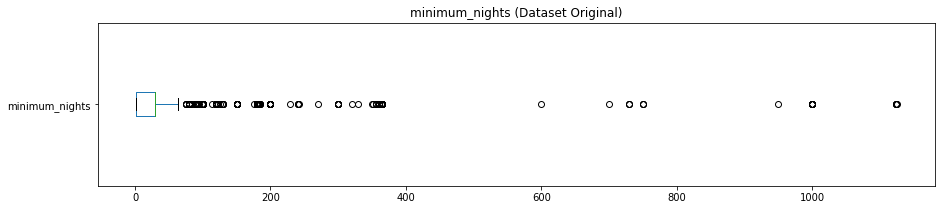

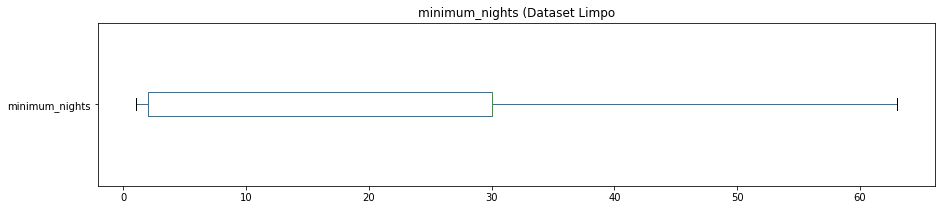

In [14]:
#boxplot minimum_nights original
fig, ax = plt.subplots(figsize=(15, 3))
df.minimum_nights.plot(kind='box', vert=False)
ax.set_title('minimum_nights (Dataset Original)')
plt.show()

# boxplot minimum_nights limpo
fig, ax = plt.subplots(figsize=(15, 3))
df_clean.minimum_nights.plot(kind='box', vert=False)
ax.set_title('minimum_nights (Dataset Limpo')
plt.show()


Aqui é possível ver o resultado da limpeza.

O boxplot mostra alguns dados como outliers na variável `price`, entretanto, esses estão sendo calculados em relação ao novo dataset, e a limpeza levou em consideração os quartis do dado original.

Para garantir que não tenha outliers que vão prejudicar a análise, será feito uma nova checagem nos histogramas das duas variáveis.

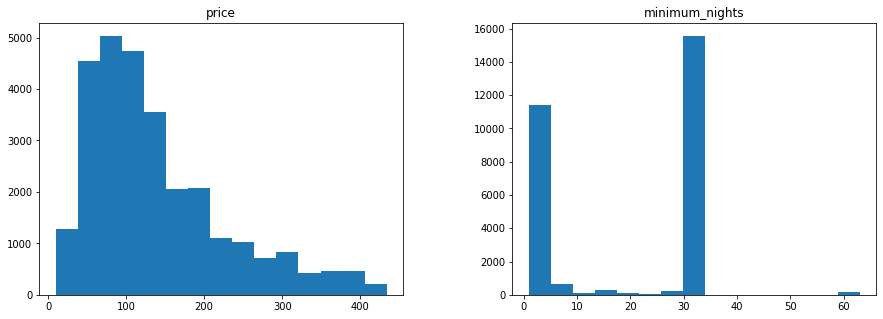

In [15]:
# histograma price e minimum_nights Limpos
df_clean[['price', 'minimum_nights']].hist(bins= 15, figsize=(15, 5), grid=False);

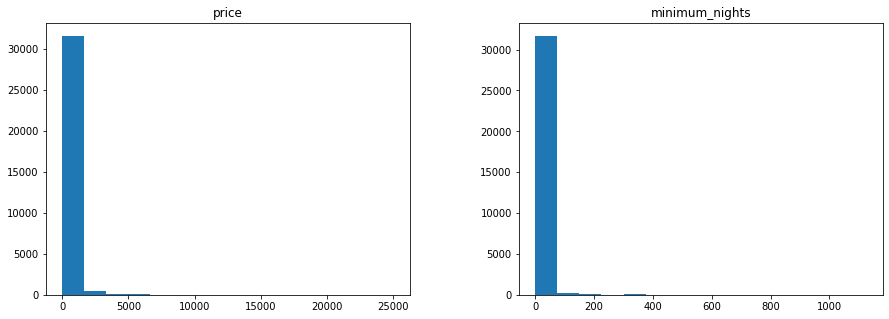

In [16]:
# histograma price e minimum_nights Originais
df[['price', 'minimum_nights']].hist(bins=15, figsize=(15, 5), grid=False);


Analizando os histogramas, é possível notar a melhora na distribuição dos dados em comparação com o dataset original, fazendo com que `outliers` não prejudiquem a análise.

# Análise Exploratória

Com os dados devidamente tratados chegou a hora de extrair as principais características e informações presentes nesses dados.

### **Q4. Qual a média dos preços de aluguel?**

Ao planejar uma viagem é importante ter uma ideia do custo com hospedagem, afim de nortear o orçamento que será destinado para essa realização. A média pode ser esse importante norte. O gasto médio por noite para se hospedar em Los Angeles é de US$ 138,88.

In [18]:
# ver a média da coluna price
print(f'A média de preços de aluguel em Los Angeles é de US$ {df_clean.price.mean():.2f}')

A média de preços de aluguel em Los Angeles é de US$ 138.88


### **Q4. Qual a correlação existente entre as variáveis**

Abaixo é criado uma matriz de correlação, tentando encontrar relações entre as variáveis numéricas. A correlação acontece quando duas ou mais variáveis estão relacionadas estatisticamente. Podendo estar diretamente relacionadas (Quando uma aumenta a outra também aumenta), ou inversamente relacionadas (quando uma aumenta a outra diminui). A intensidade dessa relação é dada pelo coeficiente de relação que varia de -1 a 1. É importante essa análise pois variáveis que estiverem correlacionadas podem sair do dataset, ficando apenas uma delas.

In [17]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights',	'number_of_reviews',	'calculated_host_listings_count',	'availability_365',	'number_of_reviews_ltm']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.084288,-0.019513,0.052752,0.115227,0.071219
minimum_nights,-0.084288,1.000000,-0.208974,0.181012,0.101389,-0.393231
number_of_reviews,-0.019513,-0.208974,1.000000,-0.123917,0.013264,0.574988
calculated_host_listings_count,0.052752,0.181012,-0.123917,1.000000,0.204358,-0.090846
availability_365,0.115227,0.101389,0.013264,0.204358,1.000000,0.026481
number_of_reviews_ltm,0.071219,-0.393231,0.574988,-0.090846,0.026481,1.000000


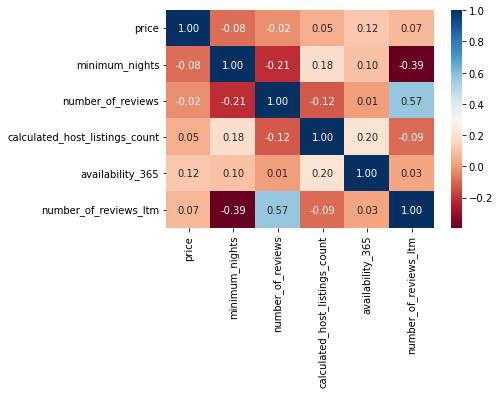

In [19]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap= 'RdBu', fmt='.2f', linecolor='white', annot=True);

A análise mostrou uma média correlação entre as variáveis `number_of_reviews` e `number_of_reviews_ltm`, o que era de se esperar, visto que ambas as variáveis mostram a quantidade de reviews das acomodações. Para essa análise não será necessário retirar nenhuma das variáveis do dataset.





### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

O *Airbnb* oferece em sua plataforma 4 categorias de imóvel para ser alugado. As categorias que mais aparecem com imóveis disponíveis são:
* Casa/Apartamento inteiro - Representando 65% de imóveis nessa categoria;
* Quarto Privado - Representando 32%;
* Quato Compartilhado - Com 2,7%;
* Quarto de Hotel - Apenas 0,3%.

Text(0, 0.5, 'Tipo de Imóvel')

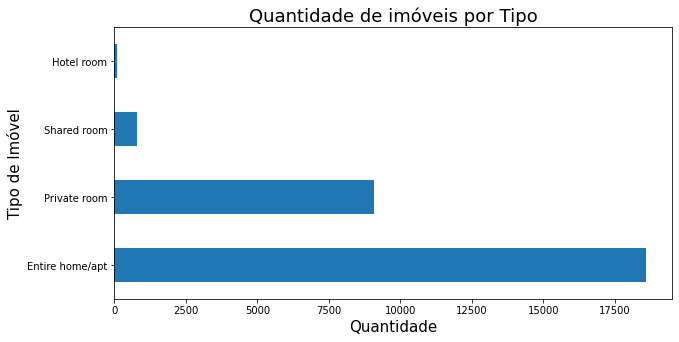

In [20]:
# mostrar a quantidade de cada tipo de imóvel disponível (Gráfico horizontal)
df_clean.room_type.value_counts().plot.barh(figsize=(10,5))
plt.title('Quantidade de imóveis por Tipo', fontsize=18)
plt.xlabel('Quantidade', fontsize=15)
plt.ylabel('Tipo de Imóvel', fontsize=15)

In [21]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    65.115220
Private room       31.802900
Shared room         2.780696
Hotel room          0.301184
Name: room_type, dtype: float64

Com essa análise chega-se a conclusão que em uma viagem para Los Angeles com intenção de ficar em um quarto de hotel, a plataforma da *Airbnb* não seria o lugar ideal para se procurar ofertas de hospedagem nessa categoria.

### **Q6. Qual a localidade mais cara de Los Angeles?**



Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [22]:
# ver preços por bairros, na média (TOP 3 mais caros)
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:3]

neighbourhood
Avalon      313.000000
Malibu      275.452055
Commerce    272.000000
Name: price, dtype: float64

In [23]:
# quantidade de locações para os 3 bairros mais caros
Avalon   = df_clean[df_clean['neighbourhood'] == 'Avalon'].shape[0]
Malibu   = df_clean[df_clean['neighbourhood'] == 'Malibu'].shape[0]
Commerce = df_clean[df_clean['neighbourhood'] == 'Commerce'].shape[0]
print(f'Avalon: {Avalon} Locações\nMalibu: {Malibu} Locações\nCommerce: {Commerce} Locações\n')

Avalon: 102 Locações
Malibu: 73 Locações
Commerce: 17 Locações



Avalon, Malibu e Commerce apresentam as três maiores médias da cidade, ficando bem acima da média geral de Los Angeles. A quantidade de imóveis nessas regiões tambem não é tão representativa, o que deve torna-los bairros mais restritos. Uma hospedagem nessa região deve ser planejada com antecedência para não ficar sem locação.

### **Q7. Qual a localidade mais barata de Los Angeles?**

Para quem quer economizar, uma hospedagem em uma localidade mais barata se torna interessante. A análise é feita da mesma maneira, utilizando o `groupby()` mas ordenando do menor para o maior.

In [24]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values()[:3]

neighbourhood
Cudahy                       14.0
Citrus                       35.0
Northwest Antelope Valley    37.0
Name: price, dtype: float64

In [25]:
# quantidade de locações para os 3 bairros mais baratos
Cudahy   = df_clean[df_clean['neighbourhood'] == 'Cudahy'].shape[0]
Citrus   = df_clean[df_clean['neighbourhood'] == 'Citrus'].shape[0]
NAV      = df_clean[df_clean['neighbourhood'] == 'Northwest Antelope Valley'].shape[0]
print(f'Cudahy: {Cudahy} Locações\nCitrus: {Citrus} Locações\nNorthwest Antelope Valley: {NAV} Locações\n')

Cudahy: 1 Locações
Citrus: 2 Locações
Northwest Antelope Valley: 2 Locações



As localidades mais baratas são Cudahy, Citrus e Northwest Antelope Valley, porém, essa análise possui amostras não-representativas, visto que a quantidade de locaçãos é muito pequena.

### **Q8. Qual é a média do mínimo de noites para aluguel para Los Angeles?**

Para se hospedar em Los Angeles a média é de no mínimo 18 noites. Isso pode dar indícios de que a demanda por locações na região é grande, visto que, seria muito mais fácil alugar 2 ou 3 noites. Outro ponto é que Los Angeles possui muito entretenimento, sendo necessário uma média maior de dias para consumir as atrações da cidade. 

In [26]:
# ver a média da coluna minimum_nights
mn = df_clean['minimum_nights'].mean()
print(f'A média da estadia mínima em Los Angeles é de {mn:.0f} noites')

A média da estadia mínima em Los Angeles é de 18 noites


### Hollywood

Aqui está grande parte da história da cidade. Famosa pela calçada da Fama e estúdios de cinema, é onde estão concentradas as maiores atrações turísticas relacionadas a esta indústria. Hollywood pode ser uma ótima opção para se hospedar. A média da diária para região é de US$ 130, mais barato que a vizinha West Hollywood.

In [27]:
# média dos preços em Hollywood
h = df_clean[df_clean['neighbourhood'] == 'Hollywood']
print(f'A média dos preços das diárias em Hollywood é de US$ {h.price.mean():.2f}')

# diária mais cara em Hollywood
print(f'A diária mais cara em Hollywood custa US$ {h.price.max():.2f}')

# diária mais barata em Hollywood
print(f'A diária mais barata em Hollywood custa US$ {h.price.min():.2f}')

# média do mínimo de noites para aluguel em Hollywood
print(f'A média da estadia mínima em Hollywood é de {h.minimum_nights.mean():.0f} noites')

A média dos preços das diárias em Hollywood é de US$ 130.72
A diária mais cara em Hollywood custa US$ 433.00
A diária mais barata em Hollywood custa US$ 24.00
A média da estadia mínima em Hollywood é de 28 noites


### West Hollywood

West Hollywood é uma opção com mais glamour em comparação com Hollywood. Possui um trecho de aproximadamente 3 Km que é considerado a casa do Rock’n Roll em Los Angeles. Sendo uma área mais restrita reflete no preço das diárias, com uma média de US$ 162 dólares.

In [28]:
# média dos preços em West Hollywood
w = df_clean[df_clean['neighbourhood'] == 'West Hollywood']
print(f'A média dos preços das diárias em West Hollywood é de US$ {w.price.mean():.2f}')

# diária mais cara em West Hollywood
print(f'A diária mais cara em West Hollywood custa US$ {w.price.max():.2f}')

# diária mais barata em West Hollywood
print(f'A diária mais barata em West Hollywood custa US$ {w.price.min():.2f}')

# média do mínimo de noites para aluguel em West Hollywood
print(f'A média da estadia mínima em West Hollywood é de {w.minimum_nights.mean():.0f} noites')

A média dos preços das diárias em West Hollywood é de US$ 162.26
A diária mais cara em West Hollywood custa US$ 429.00
A diária mais barata em West Hollywood custa US$ 33.00
A média da estadia mínima em West Hollywood é de 13 noites


### Beverly Hills

Pra o público em busca de sofisticação e elegância Beverly Hills é uma região de bons restaurantes e lojas de grife. A média nessa região é de US$ 176 a diária.

In [29]:
# média dos preços em Beverly Hills
bh = df_clean[df_clean['neighbourhood'] == 'Beverly Hills']
print(f'A média dos preços das diárias em Beverly Hills é de US$ {bh.price.mean():.2f}')

# diária mais cara em Beverly Hills
print(f'A diária mais cara em Beverly Hills custa US$ {bh.price.max():.2f}')

# diária mais barata em Beverly Hills
print(f'A diária mais barata em Beverly Hills custa US$ {bh.price.min():.2f}')

# média do mínimo de noites para aluguel em Beverly Hills
print(f'A média da estadia mínima em Beverly Hills é de {bh.minimum_nights.mean():.0f} noites')

A média dos preços das diárias em Beverly Hills é de US$ 176.49
A diária mais cara em Beverly Hills custa US$ 424.00
A diária mais barata em Beverly Hills custa US$ 20.00
A média da estadia mínima em Beverly Hills é de 14 noites


### Santa Monica

Santa Monica é uma opção de luxo pra quem deseja ficar em uma região litorânea. Possui alguns dos imóveis mais caros do mundo e fica afastada dos principais pontos turísticos de Los Angeles. Uma diária na região custa em média US$ 165.

In [30]:
# média dos preços em Santa Monica
sm = df_clean[df_clean['neighbourhood'] == 'Santa Monica']
print(f'A média dos preços das diárias em Santa Monica é de US$ {sm.price.mean():.2f}')

# diária mais cara em Santa Monica
print(f'A diária mais cara em Santa Monica custa US$ {sm.price.max():.2f}')

# diária mais barata em Santa Monica
print(f'A diária mais barata em Santa Monica custa US$ {sm.price.min():.2f}')

# média do mínimo de noites para aluguel em Santa Monica
print(f'A média da estadia mínima em Santa Monica é de {sm.minimum_nights.mean():.0f} noites')

A média dos preços das diárias em Santa Monica é de US$ 165.14
A diária mais cara em Santa Monica custa US$ 432.00
A diária mais barata em Santa Monica custa US$ 25.00
A média da estadia mínima em Santa Monica é de 19 noites


Nesta análise foi feito um gáfico comparando a média das diárias dos principais bairros citados acima com a média Geral de Los Angeles. Através dela pode-se ver que Hollywood é a melhor opção entre esses bairros com relação ao preço médio de diárias. Já Bervely Hills reflete todo o seu luxo nas diárias, ficando bem acima da média.

Text(0, 0.5, 'Preço (US$)')

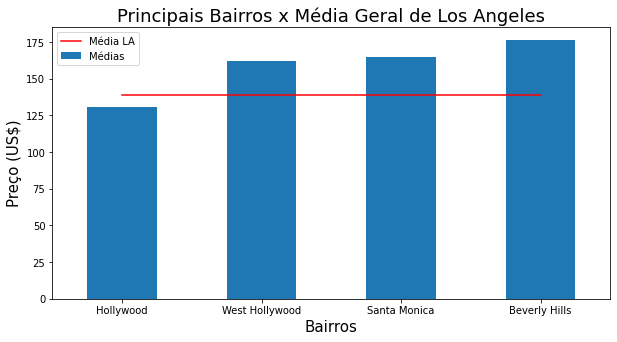

In [31]:
# comparação da média de preço dos principais bairros com a média de preço geral
Hollywood               = h.price.mean()
West_Hollywood          = w.price.mean()
Beverly_Hills           = bh.price.mean()
Santa_Monica            = sm.price.mean()
Média_Geral_Los_Angeles = df_clean.price.mean()
medias = {'Bairros': ['Hollywood', 'West Hollywood', 'Beverly Hills', 'Santa Monica'],
            'Médias': [Hollywood, West_Hollywood, Beverly_Hills, Santa_Monica],
              'Média LA': [138.88, 138.88, 138.88, 138.88]}
medias = pd.DataFrame(medias)
medias = medias.set_index('Bairros')
medias.sort_values(by = 'Médias', inplace=True)
medias['Médias'].plot.bar()
medias['Média LA'].plot.line(figsize=(10, 5), color='red')
plt.title('Principais Bairros x Média Geral de Los Angeles', fontsize=18)
plt.legend(loc='best')
plt.xlabel('Bairros', fontsize=15)
plt.ylabel('Preço (US$)', fontsize=15)

Com a latitude e longitude fornecidos pelo dataset é possível criar um gráfico com cada imóvel representado por um ponto. A análise deste gráfico indica, de maneira visual, as áreas com maior número de imóveis disponíveis na plataforma e a cor indica o preço da tarifa de cada imóvel.

Text(0.5, 1.0, 'Mapa de Calor')

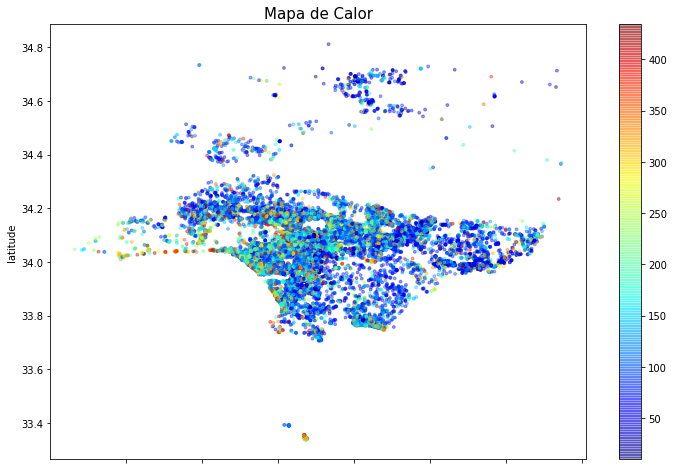

In [32]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12, 8));
plt.title('Mapa de Calor', fontsize=15)


## Conclusões


Para uma análise exploratória é importante que os dados estejam tratados da melhor forma possível, afim de que não enviesasse de modo significativo as conclusões tiradas dos dados.

Para esta análise, mesmo sendo superficial, foi preciso conhecimentos acerca de manipulação de Data Frames. Foi necessário limpar dados *missing* e *outliers* para que não atrapalhasse os resultados.

Pode-se descobrir que a média das diárias em Los Angeles é de US$ 139 dólares, e que estadias nessa região geralmente são mais longas, pois a média do mínimo de noites ofertados na plataforma é de 18. O que pode ser justificado pela quantidade de entretenimento existente na cidade, demandando uma quantidade maior de dias para conseguir usufruir essas atrações.

O estudo também revelou que casas/apartamentos inteiros e quartos privados representam 97% de toda a oferta da plataforma. Com isso, a plataforma se torna ineficiente para quem busca ficar em hotéis em Los Angeles.

Hollywood se apresentou nessa análise como sendo uma boa opção para se hospedar, pois além de ser a região mais famosa de Los Angeles e bem localizada, sua tarifa média ficou abaixo da média geral da cidade. 

Por tudo isso, foi possível notar o quão interessante pode ser fazer uma análise exploratória de grandes quantidades de dados. Podendo tirar *insights* importantes que ajudam na tomada de decisões.


